<a href="https://colab.research.google.com/github/snousind/Social-Media-Analysis/blob/Facebook/Facebook_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [ ]:
df = pd.read_excel('facebook.xlsx')

In [ ]:
df.duplicated().sum()

0

In [ ]:
df = df.drop(['title', 'in', 'images', 'url', 'hits', 'supports', 'byImageUrl', 'thankfuls'], axis=1)

In [ ]:
df = df.drop([17151,17150,17149])

In [ ]:
df.isna().sum()

content     0
from        0
date        0
by          0
comments    0
likes       0
shares      0
loves       0
wows        0
hahas       0
sads        0
angrys      0
dtype: int64

In [ ]:
df.dtypes

content             object
from                object
date        datetime64[ns]
by                  object
comments           float64
likes              float64
shares             float64
loves              float64
wows               float64
hahas              float64
sads               float64
angrys             float64
dtype: object

In [ ]:
df.columns

Index(['content', 'from', 'date', 'by', 'comments', 'likes', 'shares', 'loves',
       'wows', 'hahas', 'sads', 'angrys'],
      dtype='object')

In [ ]:
columns_aggr = ['likes', 'shares', 'loves',
       'wows', 'hahas', 'sads', 'angrys']

# Create a new column with the sum of selected columns
df['interactions'] = df[columns_aggr].sum(axis=1)

In [ ]:
reacts_sorted = df.sort_values(by='interactions', ascending = False)

In [ ]:
reacts_sorted.head()

,content,from,date,by,comments,likes,shares,loves,wows,hahas,sads,angrys,interactions
9286,We've had some special opening ceremonies �Can...,FIFA World Cup,2022-11-20 03:21:32,FIFA World Cup,48691.0,3656165.0,339926.0,1167869.0,14544.0,12343.0,2212.0,3738.0,5196797.0
10999,Can't wait for this great World Cup semi-final...,Mesut Özil,2022-12-15 02:20:37,Mesut Özil,54445.0,1779102.0,29761.0,868409.0,1603.0,6512.0,1727.0,392.0,2687506.0
14934,"Son muchos los recuerdos, buenos momentos y no...",Leo Messi,2022-11-22 04:06:08,Leo Messi,65977.0,527424.0,36493.0,513938.0,681.0,4366.0,802.0,217.0,1083921.0
10461,World Cup final � @cruzbeckhamRoad to 2022 #fi...,David Beckham,2022-12-18 23:07:03,David Beckham,7642.0,814887.0,6148.0,177540.0,679.0,514.0,60.0,153.0,999981.0
7237,Thank you for an unforgettable visit and a Wor...,Zlatan Ibrahimović,2022-12-22 00:08:16,Zlatan Ibrahimović,10244.0,713547.0,3239.0,166533.0,529.0,1429.0,99.0,253.0,885629.0


In [ ]:
print(f"There are {len(df['by'].unique())} different people/pages that posted on facebook in this dataset")

There are 2215 different people/pages that posted on facebook in this dataset


In [ ]:
df['date'] = df['date'].dt.date

In [ ]:
df['content'] = df['content'].str.lower()

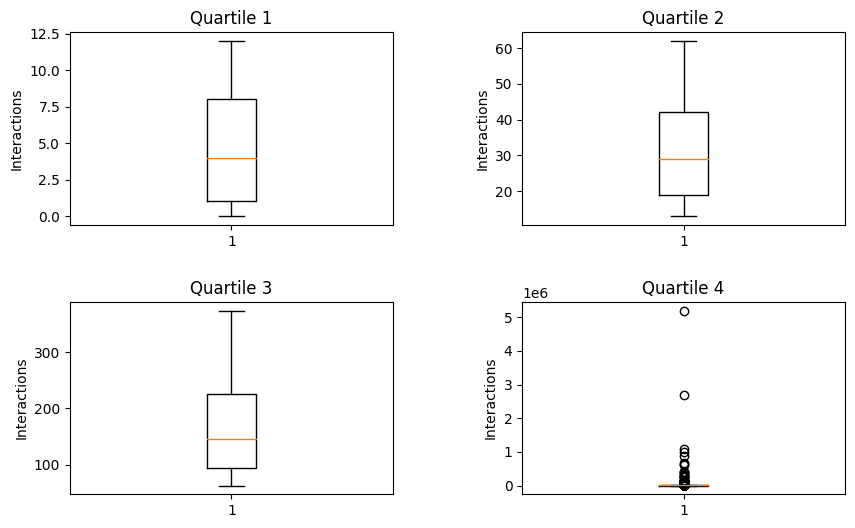

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

# Calculate quartiles
q1 = reacts_sorted['interactions'].quantile(0.25)
q2 = reacts_sorted['interactions'].quantile(0.5)
q3 = reacts_sorted['interactions'].quantile(0.75)

# Create boxplots for each quartile
axes[0, 0].boxplot(reacts_sorted['interactions'][reacts_sorted['interactions'] <= q1])
axes[0, 0].set_title('Quartile 1')
axes[0, 1].boxplot(reacts_sorted['interactions'][(reacts_sorted['interactions'] > q1) & (reacts_sorted['interactions'] <= q2)])
axes[0, 1].set_title('Quartile 2')
axes[1, 0].boxplot(reacts_sorted['interactions'][(reacts_sorted['interactions'] > q2) & (reacts_sorted['interactions'] <= q3)])
axes[1, 0].set_title('Quartile 3')
axes[1, 1].boxplot(reacts_sorted['interactions'][reacts_sorted['interactions'] > q3])
axes[1, 1].set_title('Quartile 4')

# Set y-axis labels
for ax in axes.flat:
    ax.set_ylabel('Interactions')

# Show the plot
plt.show()

In [ ]:
correlation_matrix = df[['likes', 'shares', 'loves',
       'wows', 'hahas', 'sads', 'angrys']].corr()

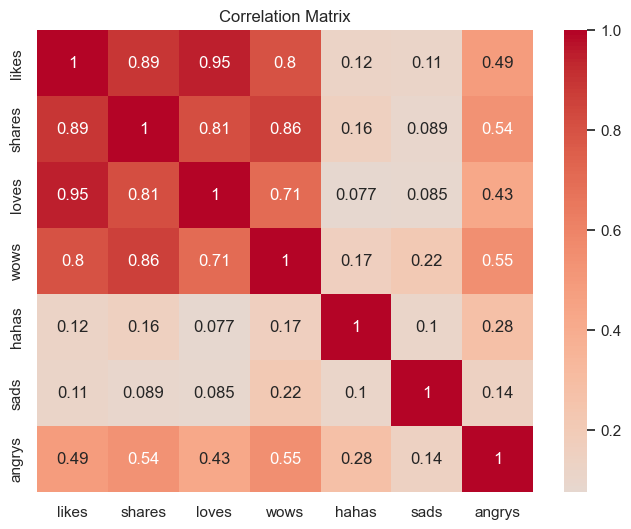

In [ ]:
sns.set(style='white')  # Set style
plt.figure(figsize=(8, 6))  # Set figure size

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)

plt.title('Correlation Matrix')
plt.show()

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\macka\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\macka\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
df['content'] = df['content'].apply(lambda text: ' '.join([word for word in word_tokenize(text) if word.lower() not in stop_words]))

In [ ]:
import re

def remove_punctuation(text):
    return re.sub(r'[^\w\s]', '', text)

df['content'] = df['content'].apply(remove_punctuation)
df.head()

,content,from,date,by,comments,likes,shares,loves,wows,hahas,sads,angrys,interactions
0,visit us https asiatimescompremium content h...,Asia Times,2022-12-22,Asia Times,0.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0
1,capacity 68000 seats al bayt stadium one stad...,HISTORY,2022-12-09,HISTORY,3.0,177.0,11.0,2.0,0.0,0.0,0.0,0.0,190.0
2,visit us https asiatimescompremium content h...,Asia Times,2022-11-16,Asia Times,0.0,5.0,0.0,1.0,0.0,1.0,0.0,0.0,7.0
3,game argentina defeated defending champion ...,Hisense,2022-12-19,Hisense,8.0,193.0,13.0,16.0,0.0,1.0,0.0,2.0,225.0
4,update spain run riot costa rica go top qatar...,Daily Monitor,2022-11-24,Daily Monitor,13.0,228.0,2.0,3.0,6.0,2.0,0.0,0.0,241.0


In [ ]:
players = pd.read_csv('player_shooting.csv')

In [ ]:
players = players['player'].tolist()

In [ ]:
surnames = [' '.join(names.split()[1:]) if len(names.split()) > 1 else names for names in players]
surnames = [string.lower() for string in surnames]

In [ ]:
from collections import Counter

In [ ]:
all_words = []
for string in df['content']:
    words = string.split()  # Split the string into words
    all_words.extend(words)

In [ ]:
word_counts = Counter(all_words)

In [ ]:
sorted_surnames = sorted(surnames, key=lambda word: word_counts.get(word, 0), reverse=True)

print("Most trending player:", sorted_surnames[0])
print("Number of mentions:", word_counts[sorted_surnames[0]])

Most trending player: messi
Number of mentions: 2513


In [ ]:
count = 0
for i in all_words:
    if i == "visit":
        count += 1
print(count)

207


In [ ]:
top_trenders = sorted_surnames[0:10]

In [ ]:
name_mentions = []
for i in range(10):
    name_mentions.append(word_counts[sorted_surnames[i]])

In [ ]:
name_mentions

[2513, 825, 343, 324, 262, 199, 142, 131, 129, 125]

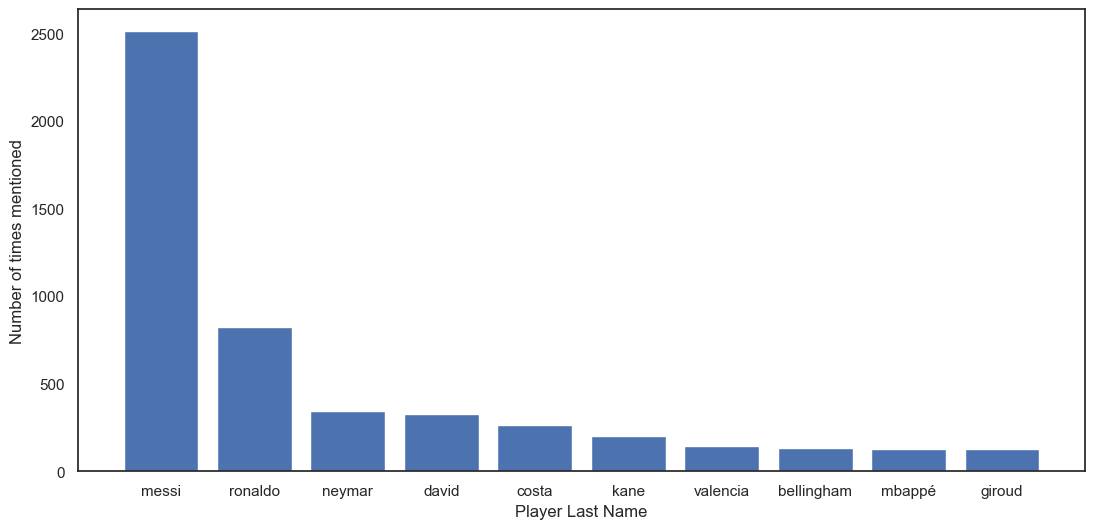

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(13, 6))
plt.bar(top_trenders, name_mentions)
plt.xlabel("Player Last Name")
plt.ylabel("Number of times mentioned")
plt.show()

In [ ]:
word_counts['mbappe']

486

In [ ]:
word_counts['mbappé']

129